In [1]:
!pip install pydotplus
!pip install xgboost

     |████████████████████████████████| 286kB 3.0MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-cp36-none-any.whl size=25389 sha256=199ff85cdc249047fdfced8c362da34579ad930eb3b4935669b5fd244a9f5bb7
  Stored in directory: /home/nbuser/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
You should consider upgrading via the 'pip install --upgrade pip' command.
     |████████████████████████████████| 142.8MB 1.1kB/s eta 0:00:01     |██████▍                         | 28.7MB 246kB/s eta 0:07:44     |██████▋                         | 29.7MB 246kB/s eta 0:07:40███▋                        | 34.1MB 166kB/s eta 0:10:52.9MB 303kB/s eta 0:05:49     |████████▍                       | 37.4MB 303kB/s eta 0:05:47.6MB 303kB/s eta 0:05:47.5MB 303kB/s eta 0:05:44.5MB 882kB/s eta 0:01:57��█████▍                      | 41.9MB 882kB/s eta 0:01:55��██████                      | 45.1MB 169kB/s eta 0:09:38.2MB 169kB/s eta 0:09:32.6

      Successfully uninstalled matplotlib-3.0.0
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
#visualisation
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
import graphviz 
import pydotplus
#algorithms
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO
from IPython.display import Image 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import  precision_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
sdata = pd.read_excel ('satisfaction.xlsx')
sdata.dtypes

id                                     int64
satisfaction                           int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure 

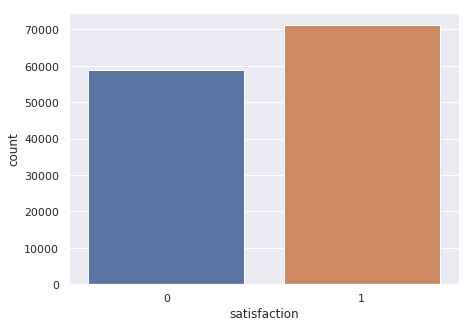

In [39]:
sns.set(style='whitegrid', color_codes=True)
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot('satisfaction', data=sdata)

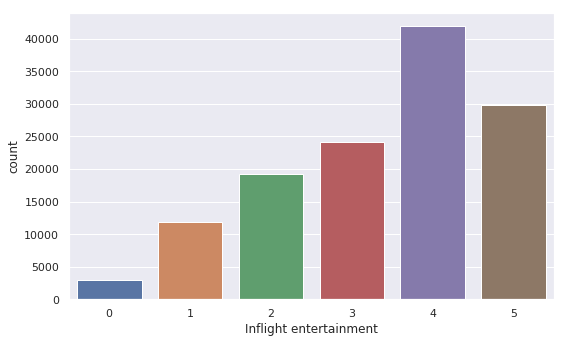

In [35]:
sns.set(style='whitegrid', color_codes=True)
sns.set(rc={'figure.figsize':(8.7,5.27)})
sns.countplot('Inflight entertainment', data=sdata)

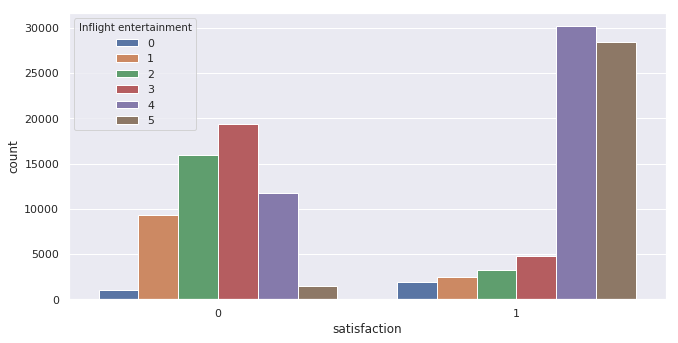

In [30]:
sns.set(style='whitegrid', color_codes=True)
sns.set(rc={'figure.figsize':(10.7,5.27)})
sns.countplot('satisfaction', data=sdata, hue = 'Inflight entertainment')

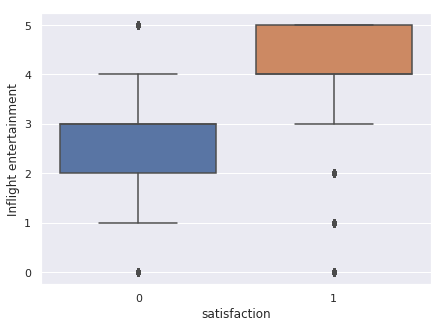

In [40]:
sns.boxplot('satisfaction', 'Inflight entertainment', data=sdata)

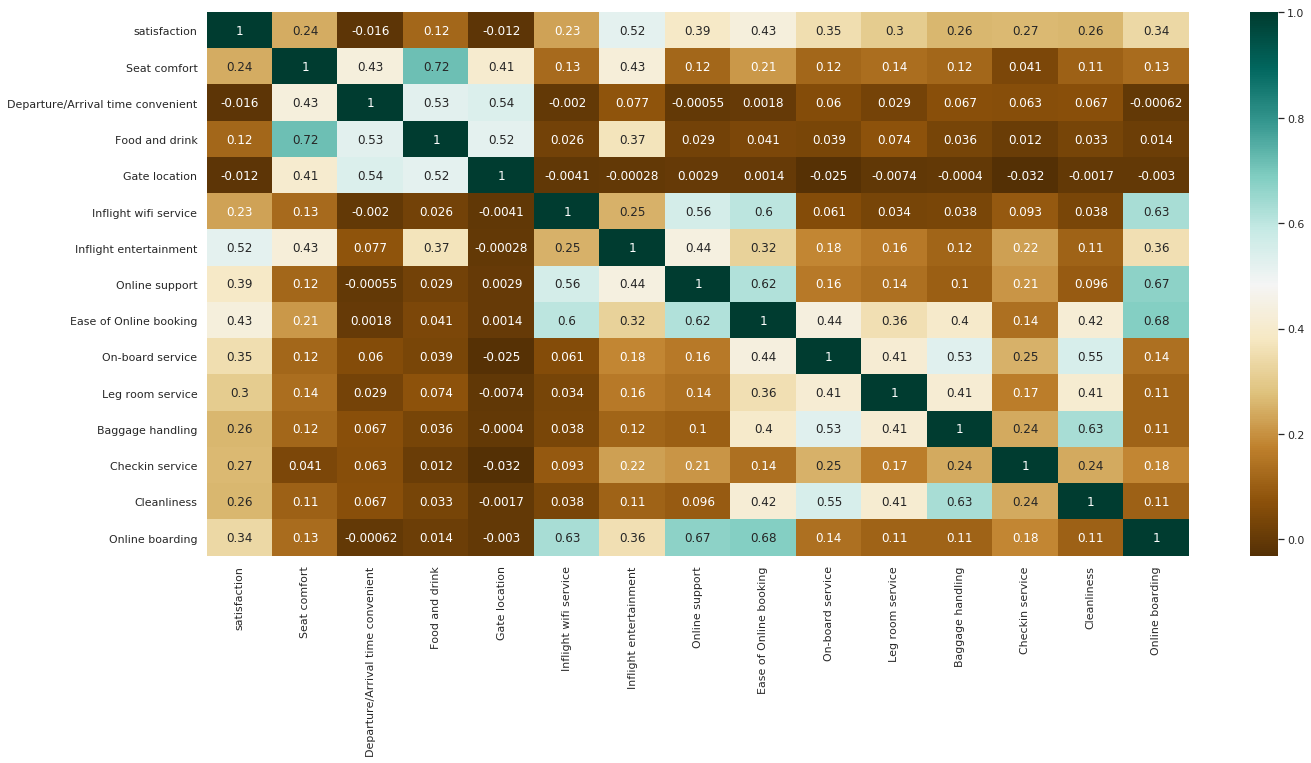

In [31]:
# Finding the relationships between the attributes.
plt.figure(figsize=(22,10))
cdata = sdata.corr()
sns.heatmap(cdata, cmap="BrBG", annot=True)

In [32]:
sdata.tail()

,satisfaction,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
129875,1,5,5,5,3,2,5,2,2,3,3,4,4,4,2
129876,0,2,3,2,4,2,1,1,3,2,3,3,1,2,1
129877,0,3,0,3,3,3,2,2,4,4,3,4,2,3,2
129878,0,3,2,3,2,3,2,2,3,3,2,3,2,1,2
129879,0,3,4,3,3,3,3,3,4,5,5,5,3,3,3


In [4]:
duplicate_rows = sdata[sdata.duplicated('id')]
print("the number of duplicate rows: ", duplicate_rows.shape)

the number of duplicate rows:  (0, 24)


In [34]:
sdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 15 columns):
satisfaction                         129880 non-null int64
Seat comfort                         129880 non-null int64
Departure/Arrival time convenient    129880 non-null int64
Food and drink                       129880 non-null int64
Gate location                        129880 non-null int64
Inflight wifi service                129880 non-null int64
Inflight entertainment               129880 non-null int64
Online support                       129880 non-null int64
Ease of Online booking               129880 non-null int64
On-board service                     129880 non-null int64
Leg room service                     129880 non-null int64
Baggage handling                     129880 non-null int64
Checkin service                      129880 non-null int64
Cleanliness                          129880 non-null int64
Online boarding                      129880 non-null int64
dtyp

In [41]:
print(sdata.isnull().sum())

satisfaction                         0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
dtype: int64


In [5]:
del sdata['id']
del sdata['Gender']
del sdata['Customer Type']
del sdata['Age']
del sdata['Type of Travel']
del sdata['Class']
del sdata['Flight Distance']
del sdata['Departure Delay in Minutes']
del sdata['Arrival Delay in Minutes']

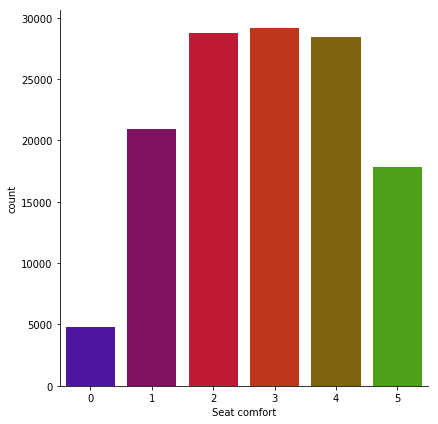

In [4]:
sns.catplot(x="Seat comfort", kind="count", palette="brg", data = sdata, height = 6)

In [6]:
#create a list, and group values
data_list = sdata.values.tolist()
for i in range(0, 129880):
    for j in range(1, 15):
        if data_list[i][j] == 4 or data_list[i][j] == 5 :
            data_list[i][j] = 'high'
        else:
            data_list[i][j] = 'low' 

In [7]:
#list convert to dataframe
sdata_group = pd.DataFrame(data_list)

In [8]:
#copy column names to new dataframe
sdata_group_new =  pd.DataFrame(data=sdata_group.values, columns=sdata.columns)

In [36]:
sdata_group_new.head()

,satisfaction,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,1,low,low,low,low,low,high,low,low,low,low,low,high,low,low
1,1,low,low,low,low,low,low,low,low,high,high,high,low,low,low
2,1,low,low,low,low,low,low,low,low,low,low,high,high,high,low
3,1,low,low,low,low,low,high,low,low,low,low,low,high,low,low
4,1,low,low,low,low,high,low,high,low,low,low,low,high,low,high


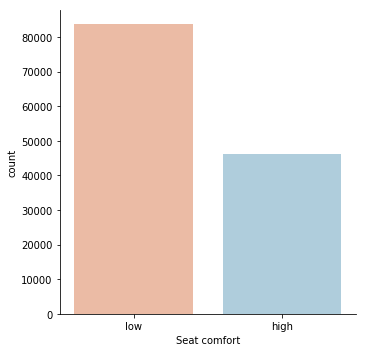

In [12]:
sns.catplot(x="Seat comfort",kind="count",palette="RdBu",data=sdata_group_new,height = 5)

In [9]:
sdata2015 = pd.read_excel ('satisfaction_2015.xlsx')
print (sdata2015.shape)
print (sdata2015.dtypes)

(129880, 24)
id                                     int64
satisfaction                           int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int

In [10]:
del sdata2015['id']
del sdata2015['Gender']
del sdata2015['Customer Type']
del sdata2015['Age']
del sdata2015['Type of Travel']
del sdata2015['Class']
del sdata2015['Flight Distance']
del sdata2015['Departure Delay in Minutes']
del sdata2015['Arrival Delay in Minutes']

In [11]:
data2015_list = sdata2015.values.tolist()
for i in range(0, 129880):
    for j in range(1, 15):
        if data2015_list[i][j] == 4 or data2015_list[i][j] == 5 :
            data2015_list[i][j] = 'high'
        else:
            data2015_list[i][j] = 'low' 
            
sdata2015_group = pd.DataFrame(data2015_list)
sdata2015_group_new =  pd.DataFrame(data=sdata2015_group.values, columns=sdata2015.columns)

In [12]:
sdata_total = sdata_group_new.append(sdata2015_group_new, ignore_index=True)
sdata_total.tail()

,satisfaction,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
259755,1,high,high,high,high,high,high,high,high,high,high,high,high,high,low
259756,1,high,low,high,low,high,high,high,low,high,high,low,low,high,high
259757,1,high,low,high,low,low,high,low,low,low,low,low,high,low,high
259758,1,high,low,high,low,low,high,high,low,high,high,low,high,high,high
259759,1,high,low,high,low,low,high,high,low,low,high,high,high,high,high


In [81]:
sdata_total.dtypes

satisfaction                         object
Seat comfort                         object
Departure/Arrival time convenient    object
Food and drink                       object
Gate location                        object
Inflight wifi service                object
Inflight entertainment               object
Online support                       object
Ease of Online booking               object
On-board service                     object
Leg room service                     object
Baggage handling                     object
Checkin service                      object
Cleanliness                          object
Online boarding                      object
dtype: object

In [17]:
sdata_total.head()

,satisfaction,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,1,low,low,low,low,low,high,low,low,low,low,low,high,low,low
1,1,low,low,low,low,low,low,low,low,high,high,high,low,low,low
2,1,low,low,low,low,low,low,low,low,low,low,high,high,high,low
3,1,low,low,low,low,low,high,low,low,low,low,low,high,low,low
4,1,low,low,low,low,high,low,high,low,low,low,low,high,low,high


In [13]:
#transform values
data_total_list = sdata_total.values.tolist()
for i in range(0, 259760):
    for j in range(1, 15):
        if data_total_list[i][j] == 'high' :
            data_total_list[i][j] = 1
        else:
            data_total_list[i][j] = 0 
sdata_total_new = pd.DataFrame(data_total_list)
sdata_total_new = pd.DataFrame(data=sdata_total_new.values, columns=sdata_total.columns)
#set data types
sdata_total_new['satisfaction'] = sdata_total_new['satisfaction'].astype("int")
sdata_total_new['Seat comfort'] = sdata_total_new['Seat comfort'].astype("int")
sdata_total_new['Departure/Arrival time convenient'] = sdata_total_new['Departure/Arrival time convenient'].astype("int")
sdata_total_new['Food and drink'] = sdata_total_new['Food and drink'].astype("int")
sdata_total_new['Gate location'] = sdata_total_new['Gate location'].astype("int")
sdata_total_new['Inflight wifi service'] = sdata_total_new['Inflight wifi service'].astype("int")
sdata_total_new['Inflight entertainment'] = sdata_total_new['Inflight entertainment'].astype("int")
sdata_total_new['Online support'] = sdata_total_new['Online support'].astype("int")
sdata_total_new['Ease of Online booking'] = sdata_total_new['Ease of Online booking'].astype("int")
sdata_total_new['On-board service'] = sdata_total_new['On-board service'].astype("int")
sdata_total_new['Leg room service'] = sdata_total_new['Leg room service'].astype("int")
sdata_total_new['Baggage handling'] = sdata_total_new['Baggage handling'].astype("int")
sdata_total_new['Checkin service'] = sdata_total_new['Checkin service'].astype("int")
sdata_total_new['Cleanliness'] = sdata_total_new['Cleanliness'].astype("int")
sdata_total_new['Online boarding'] = sdata_total_new['Online boarding'].astype("int")
sdata_total_new.dtypes

satisfaction                         int64
Seat comfort                         int64
Departure/Arrival time convenient    int64
Food and drink                       int64
Gate location                        int64
Inflight wifi service                int64
Inflight entertainment               int64
Online support                       int64
Ease of Online booking               int64
On-board service                     int64
Leg room service                     int64
Baggage handling                     int64
Checkin service                      int64
Cleanliness                          int64
Online boarding                      int64
dtype: object

In [19]:
sdata_total_new.head()

,satisfaction,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0
3,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1


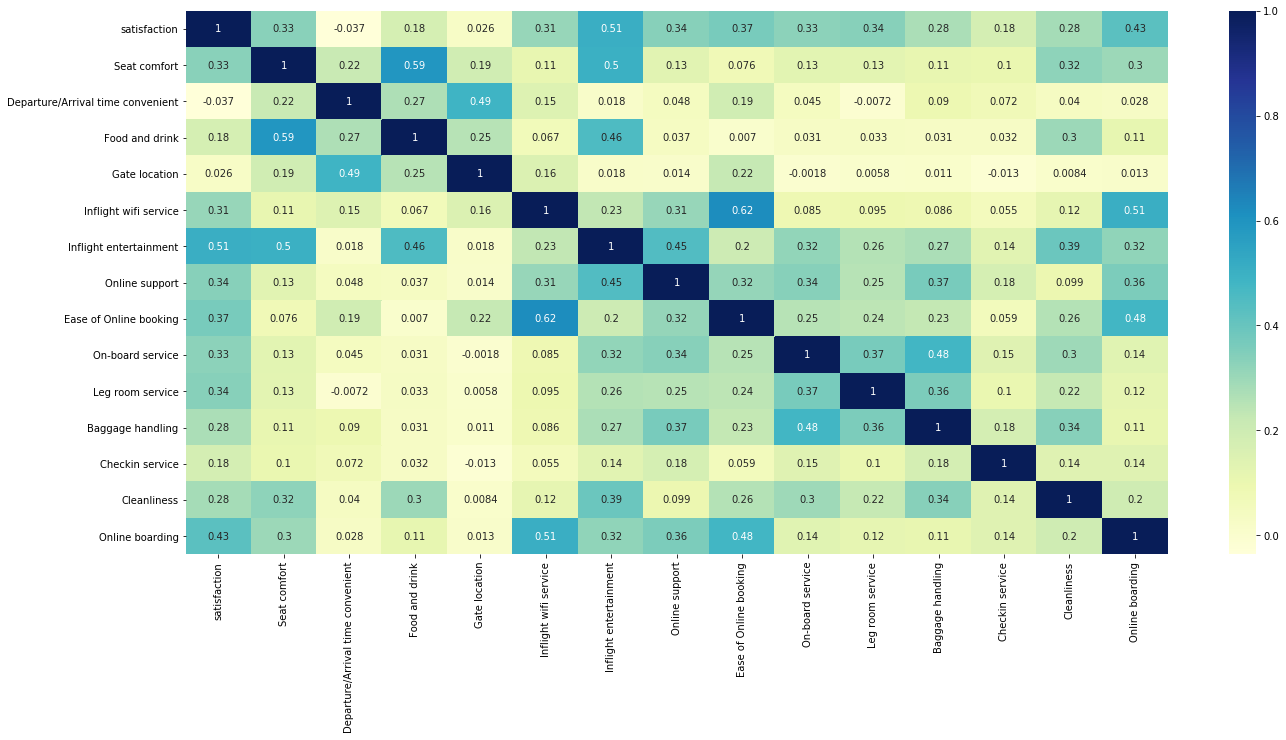

In [96]:
plt.figure(figsize=(22,10))
cdata = sdata_total_new.corr()
sns.heatmap(cdata, cmap="YlGnBu", annot=True)

In [14]:
del sdata_total_new['Departure/Arrival time convenient']
del sdata_total_new['Food and drink']
del sdata_total_new['Gate location']
del sdata_total_new['Checkin service']
sdata_total_new.head()

,satisfaction,Seat comfort,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Cleanliness,Online boarding
0,1,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,1,1,0,0
2,1,0,0,0,0,0,0,0,1,1,0
3,1,0,0,1,0,0,0,0,0,0,0
4,1,0,1,0,1,0,0,0,0,0,1


In [21]:
sdata_total_new['satisfaction'].value_counts()

0    132245
1    127515
Name: satisfaction, dtype: int64

0    132245
1    127515
Name: satisfaction, dtype: int64

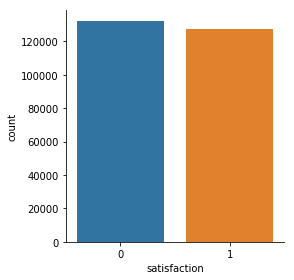

In [37]:
sns.catplot(x="satisfaction",kind="count",data=sdata_total_new,height = 4)
sdata_total_new['satisfaction'].value_counts()

In [15]:
sdata_total_new.rename(columns = {'Seat comfort':'Seat_comfort', 'Inflight wifi service':'Inflight_wifi_service', 'Inflight entertainment':'Inflight_entertainment',
                        'Online support':'Online_support','Ease of Online booking':'Ease_of_Online_booking','On-board service':'On-board_service',
                        'Leg room service': 'Leg_room_service','Baggage handling':'Baggage_handling','Online boarding':'Online_boarding'}, inplace=True)

sdata_total_new.head()

,satisfaction,Seat_comfort,Inflight_wifi_service,Inflight_entertainment,Online_support,Ease_of_Online_booking,On-board_service,Leg_room_service,Baggage_handling,Cleanliness,Online_boarding
0,1,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,1,1,0,0
2,1,0,0,0,0,0,0,0,1,1,0
3,1,0,0,1,0,0,0,0,0,0,0
4,1,0,1,0,1,0,0,0,0,0,1


In [16]:
inputs = sdata_total_new.drop('satisfaction', axis=1)
target = sdata_total_new['satisfaction']
inputs.dtypes

Seat_comfort              int64
Inflight_wifi_service     int64
Inflight_entertainment    int64
Online_support            int64
Ease_of_Online_booking    int64
On-board_service          int64
Leg_room_service          int64
Baggage_handling          int64
Cleanliness               int64
Online_boarding           int64
dtype: object

In [17]:
#split data into train and test sets
inputs_train, inputs_test, target_train, target_test = train_test_split(
    inputs, target, test_size=0.20)

In [34]:
#Compare several classification algorithms

#create a list to store algorithms
Algorithms = [ LogisticRegression(),SGDClassifier(), GaussianNB(), XGBClassifier(),
                DecisionTreeClassifier(),]
#create a dataframe to store comparison results
Algorithms_columns = []
Algorithms_results = pd.DataFrame(columns = Algorithms_columns)

row_index = 0
for algo in Algorithms:
 #loop display results       
    predictor = algo.fit(inputs_train, target_train).predict(inputs_test)
    Algorithm_name = algo.__class__.__name__
    Algorithms_results.loc[row_index,'Algorithm Name'] = Algorithm_name
    Algorithms_results.loc[row_index, 'Training Accuracy'] = round(algo.score(inputs_train, target_train), 3)
    Algorithms_results.loc[row_index, 'Testing Accuracy'] = round(algo.score(inputs_test, target_test), 3)
    Algorithms_results.loc[row_index, 'Overall Accuracy'] = round(accuracy_score(target_test, predictor), 3)
    Algorithms_results.loc[row_index, 'precision'] = round(precision_score(target_test, predictor), 3)

    row_index += 1

#Algorithms_results.sort_values(by = ['Overall Accuracy'], ascending = False, inplace = True)    
Algorithms_results

,Algorithm Name,Training Accuracy,Testing Accuracy,Overall Accuracy,precision
0,LogisticRegression,0.790,0.792,0.792,0.790
1,SGDClassifier,0.792,0.794,0.794,0.803
2,GaussianNB,0.775,0.776,0.776,0.766
3,XGBClassifier,0.834,0.837,0.837,0.842
4,DecisionTreeClassifier,0.854,0.854,0.854,0.856


Text(0, 0.5, 'Accuracy')

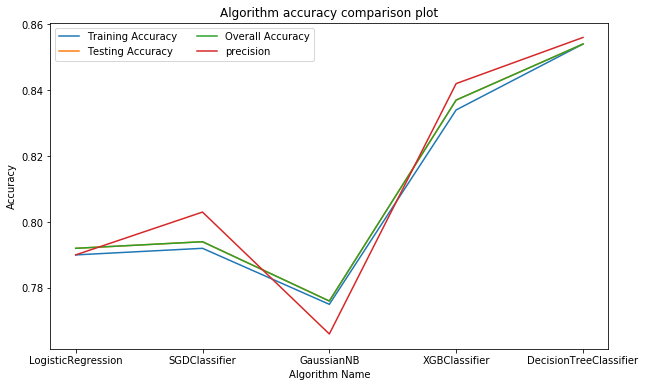

In [35]:
# multiple line plot
plt.figure(figsize=(10, 6))

num = 0
for column in Algorithms_results.drop('Algorithm Name', axis=1):
    num += 1
    plt.plot(Algorithms_results['Algorithm Name'], Algorithms_results[column])

plt.legend(Algorithms_results.drop('Algorithm Name', axis=1), loc=2, ncol=2)

# Add titles
plt.title("Algorithm accuracy comparison plot")
plt.xlabel("Algorithm Name")
plt.ylabel("Accuracy")


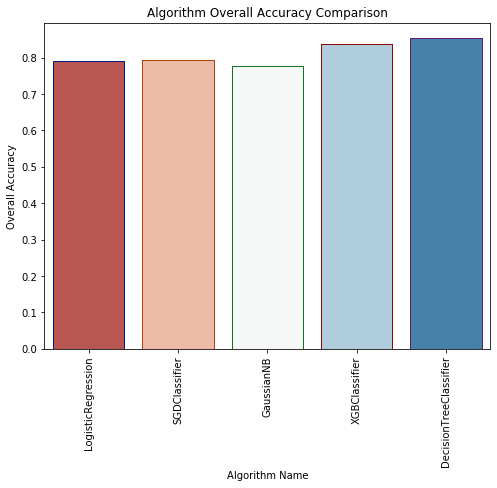

In [36]:
plt.subplots(figsize=(8,6))
sns.barplot(x="Algorithm Name", y="Overall Accuracy",data=Algorithms_results,
            palette='RdBu',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Algorithm Overall Accuracy Comparison')
plt.show()

In [40]:
#Decision Tree for Classification
classifier = tree.DecisionTreeClassifier()
classifier.fit(inputs_train, target_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
#caculate the accuracy values
predictor = classifier.predict(inputs_test)
accuracy = accuracy_score(target_test, predictor)
print("Prediction Accuracy of Decision Tree: %.2f%%" % (accuracy * 100.0) )
print(" ")
print(classification_report(target_test, predictor))

Prediction Accuracy of Decision Tree: 85.36%
 
              precision    recall  f1-score   support

           0       0.85      0.86      0.86     26369
           1       0.86      0.85      0.85     25583

   micro avg       0.85      0.85      0.85     51952
   macro avg       0.85      0.85      0.85     51952
weighted avg       0.85      0.85      0.85     51952



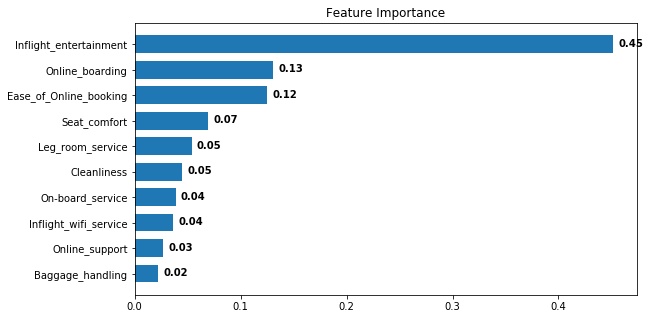

In [42]:
importances = classifier.feature_importances_ 
#sort feature importance
feature_sorted = np.argsort(importances)[::1]
#plot feature importance
fig, ax = plt.subplots(figsize = (9,5))
# the x locations for the groups
ind = np.arange(len(importances)) 
for i, v in enumerate(importances[feature_sorted]):
    ax.text(v + .005, i - .1, str(round(v, 2)), fontweight='bold')
ax.barh(ind, importances[feature_sorted], 0.7)
ax.set_yticks(ind)
ax.set_yticklabels(inputs.columns[feature_sorted])

plt.title('Feature Importance', fontsize = 12)
plt.show()  

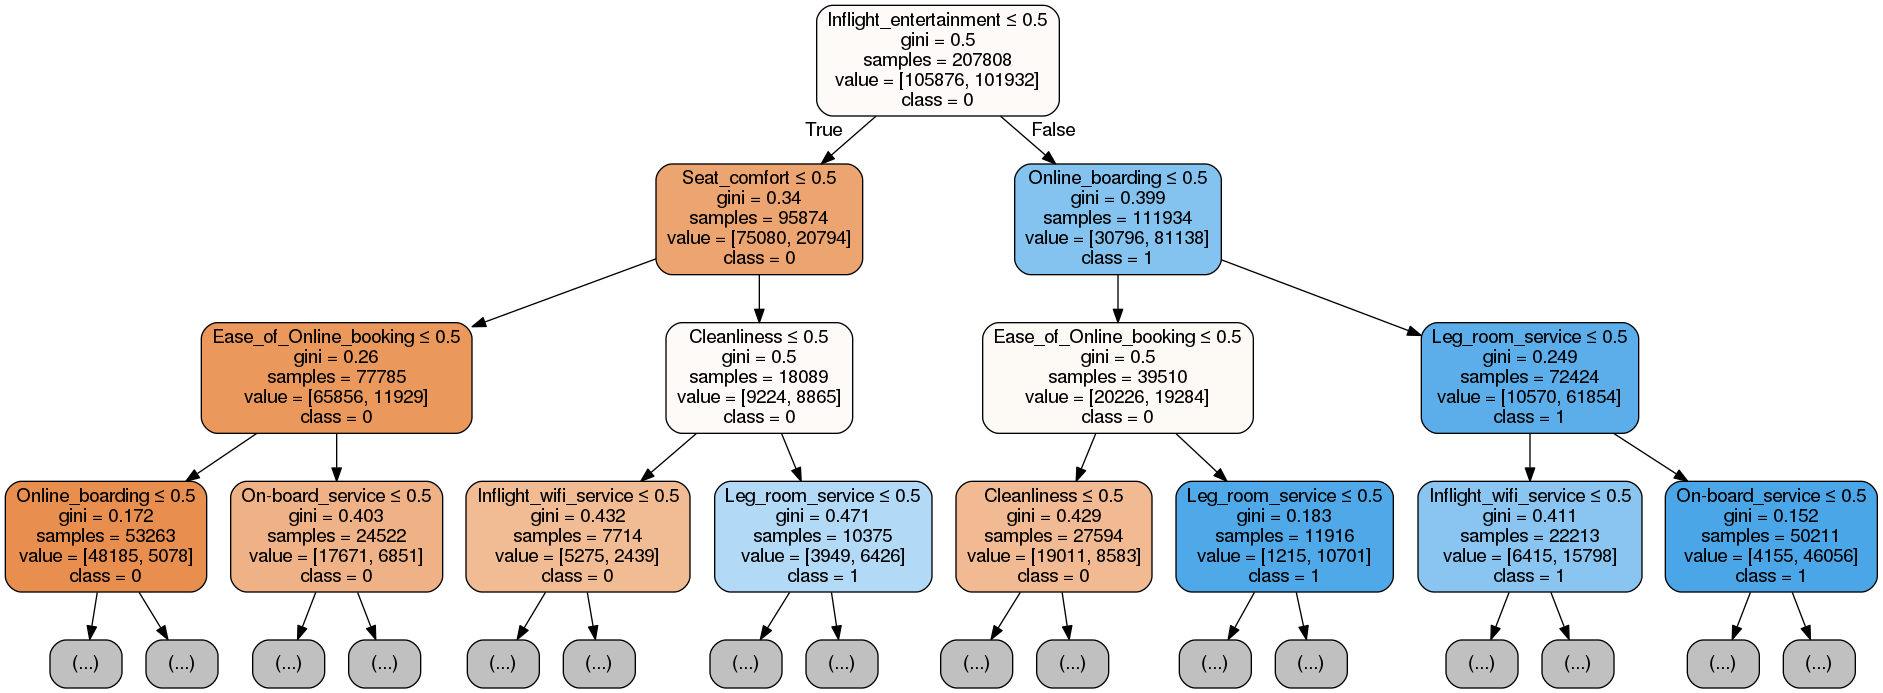

In [43]:
#display decision tree figure
dot_data = StringIO()

# export the trained decision tree
tree.export_graphviz(classifier, out_file=dot_data, feature_names=inputs.columns,class_names=['0', '1'],
                         filled=True, rounded=True, special_characters=True, max_depth=3)

#draw decision tree
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
#graph.write_png('decision-tree.png')
